In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df_train = pd.read_csv("selected_5000.csv")
df_test = pd.read_csv("predicted_actives_gbm.csv")

df_train

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
0,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.52356,-0.864904,0.333333,3.134230,0
1,0,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,4.85798,-0.686336,0.000000,1.622290,0
2,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,5.42626,-0.349615,0.342857,1.521120,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.24793,0.002651,0.000000,0.343511,0
4,1,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,4.80735,-0.656633,0.260870,2.025720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.24800,-0.798000,0.414000,3.011000,1
5352,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.20900,-0.790000,0.429000,2.788000,1
5353,1,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,4.90700,-0.717000,0.240000,3.179000,1
5354,3,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,5.55500,-0.767000,0.514000,4.465000,1


In [118]:
#Removing low variance columns
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=(.8*(1-.8)))

In [119]:
#Split dataset into training set and testing set
X = df_train
y = df_train['Activity']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [120]:
#Fit
_ = vt.fit(X_train)

In [121]:
#Get the mask
mask = vt.get_support()

In [122]:
#Subset the DataFrame
X_train = X_train.loc[:, mask]
X_test = X_test.loc[:,mask]

In [123]:
df_train_2 = X_train
df_train_2

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
1022,2,0,2,14,2,10,2,12,32.0,19,...,0,1,0,0,2,1,1,0,0,2.557720
3451,1,1,3,12,4,9,6,6,42.0,23,...,0,0,0,2,0,1,1,3,1,2.271320
26,1,1,1,8,3,4,2,6,20.0,9,...,1,2,0,0,0,0,0,0,0,0.800588
3264,2,2,2,17,4,8,5,12,42.0,13,...,1,0,0,0,0,0,1,3,1,2.976150
1520,2,2,2,17,4,8,5,12,42.0,17,...,2,1,0,0,1,0,0,2,0,2.550980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,2,1,3,16,5,7,4,12,42.0,19,...,1,1,0,0,0,0,2,1,0,1.400970
1163,2,0,2,16,2,15,4,12,41.0,21,...,2,4,0,0,0,0,0,0,0,2.676130
909,2,1,2,14,3,8,2,12,35.0,22,...,0,1,1,1,0,0,1,0,0,2.863140
3553,1,1,2,10,4,8,4,6,33.0,19,...,0,0,1,0,1,0,0,1,1,1.479300


In [124]:
X = df_test.drop(['USER_ID'],axis=1)
y = df_test['USER_ID']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.1)

In [125]:
#Fit
_ = vt.fit(X_train)

In [126]:
#Get the mask
mask = vt.get_support()
#Subset the DataFrame
test_X_train = X_train.loc[:, mask]
test_X_test = X_test.loc[:,mask]

In [127]:
df_test_2 = test_X_train
df_test_2

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D754,D755,D756,D758,D759,D761,D762,D763,D765,D777
16,2,1,3,15,5,8,3,12,40,14,...,1,0,1,0,0,0,1,1,1,4.68560
2,3,1,4,20,6,9,2,18,49,31,...,1,0,0,0,2,1,1,0,1,4.08437
8,2,1,4,16,6,6,4,12,44,25,...,0,0,0,0,2,0,0,0,2,3.49136
19,2,1,4,16,6,5,4,12,43,23,...,0,0,0,0,2,0,0,0,2,3.28023
13,2,1,5,19,9,4,7,12,52,21,...,2,0,0,1,2,0,0,2,1,2.71687
9,2,2,3,18,6,5,6,12,45,20,...,1,0,0,0,0,0,1,1,2,3.20774
11,3,0,4,21,5,11,3,18,48,20,...,1,0,3,0,0,0,1,1,1,4.78669
7,2,1,4,20,6,10,8,12,53,25,...,1,0,1,1,0,2,0,0,2,2.84712
5,2,1,4,16,6,5,4,12,43,23,...,0,0,0,0,2,0,0,0,2,3.54823
0,3,1,4,23,6,10,5,18,53,26,...,1,0,1,0,0,3,0,0,1,3.66371


In [128]:
df_extract = df_train_2.iloc[:,0:356]
df_lev = df_train_2.iloc[:,0:356]
df_extract

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
1022,2,0,2,14,2,10,2,12,32.0,19,...,0,1,0,0,2,1,1,0,0,2.557720
3451,1,1,3,12,4,9,6,6,42.0,23,...,0,0,0,2,0,1,1,3,1,2.271320
26,1,1,1,8,3,4,2,6,20.0,9,...,1,2,0,0,0,0,0,0,0,0.800588
3264,2,2,2,17,4,8,5,12,42.0,13,...,1,0,0,0,0,0,1,3,1,2.976150
1520,2,2,2,17,4,8,5,12,42.0,17,...,2,1,0,0,1,0,0,2,0,2.550980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,2,1,3,16,5,7,4,12,42.0,19,...,1,1,0,0,0,0,2,1,0,1.400970
1163,2,0,2,16,2,15,4,12,41.0,21,...,2,4,0,0,0,0,0,0,0,2.676130
909,2,1,2,14,3,8,2,12,35.0,22,...,0,1,1,1,0,0,1,0,0,2.863140
3553,1,1,2,10,4,8,4,6,33.0,19,...,0,0,1,0,1,0,0,1,1,1.479300


In [129]:
df_test_extract = df_test_2.iloc[:,0:280]
df_test_lev = df_test_2.iloc[:,0:280]
df_test_extract

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D739,D740,D742,D744,D746,D747,D748,D749,D754,D755
16,2,1,3,15,5,8,3,12,40,14,...,2,0,0,1,0,0,1,0,1,0
2,3,1,4,20,6,9,2,18,49,31,...,3,0,0,1,0,1,1,0,1,0
8,2,1,4,16,6,6,4,12,44,25,...,1,0,0,3,1,0,0,1,0,0
19,2,1,4,16,6,5,4,12,43,23,...,1,0,0,3,0,0,0,1,0,0
13,2,1,5,19,9,4,7,12,52,21,...,1,1,0,0,0,1,0,0,2,0
9,2,2,3,18,6,5,6,12,45,20,...,1,1,0,3,2,0,0,1,1,0
11,3,0,4,21,5,11,3,18,48,20,...,7,0,0,1,0,0,0,0,1,0
7,2,1,4,20,6,10,8,12,53,25,...,3,0,1,1,0,3,1,0,1,0
5,2,1,4,16,6,5,4,12,43,23,...,1,0,0,2,1,0,0,0,0,0
0,3,1,4,23,6,10,5,18,53,26,...,4,0,1,0,0,3,1,0,1,0


In [130]:
#Calculating the mean and standard deviations of train dataset
mean = df_extract.mean(axis=0)
std = df_extract.std(axis=0)
df_train_3 = df_extract.append(pd.DataFrame([mean]),ignore_index=True)
df_train_3 = df_train_3.append(pd.DataFrame([std]),ignore_index=True)
df_train_3

C:\Users\brian\AppData\Local\Temp\ipykernel_39400\3096718968.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_3 = df_extract.append(pd.DataFrame([mean]),ignore_index=True)
C:\Users\brian\AppData\Local\Temp\ipykernel_39400\3096718968.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_3 = df_train_3.append(pd.DataFrame([std]),ignore_index=True)


,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
0,2.000000,0.000000,2.000000,14.000000,2.000000,10.000000,2.000000,12.000000,32.000000,19.000000,...,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.557720
1,1.000000,1.000000,3.000000,12.000000,4.000000,9.000000,6.000000,6.000000,42.000000,23.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,3.000000,1.000000,2.271320
2,1.000000,1.000000,1.000000,8.000000,3.000000,4.000000,2.000000,6.000000,20.000000,9.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800588
3,2.000000,2.000000,2.000000,17.000000,4.000000,8.000000,5.000000,12.000000,42.000000,13.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2.976150
4,2.000000,2.000000,2.000000,17.000000,4.000000,8.000000,5.000000,12.000000,42.000000,17.000000,...,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.550980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,2.000000,1.000000,2.000000,14.000000,3.000000,8.000000,2.000000,12.000000,35.000000,22.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.863140
4282,1.000000,1.000000,2.000000,10.000000,4.000000,8.000000,4.000000,6.000000,33.000000,19.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.479300
4283,1.000000,0.000000,1.000000,9.000000,1.000000,17.000000,3.000000,6.000000,32.000000,28.000000,...,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.241530
4284,1.379785,0.833333,2.154762,12.086601,3.770075,8.047152,3.773343,8.247199,34.708800,18.863212,...,0.402894,0.651727,0.415966,0.478992,0.274977,0.169935,0.397759,0.958917,0.349907,2.169477


In [131]:
#Calculating the mean and standard deviations for test dataset
test_mean = df_test_extract.mean(axis=0)
test_std = df_test_extract.std(axis=0)
df_test_3 = df_test_extract.append(pd.DataFrame([mean]),ignore_index=True)
df_test_3 = df_test_3.append(pd.DataFrame([std]),ignore_index=True)
df_test_3

C:\Users\brian\AppData\Local\Temp\ipykernel_39400\3597620245.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_3 = df_test_extract.append(pd.DataFrame([mean]),ignore_index=True)
C:\Users\brian\AppData\Local\Temp\ipykernel_39400\3597620245.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_3 = df_test_3.append(pd.DataFrame([std]),ignore_index=True)


,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D745,D756,D758,D759,D761,D762,D763,D765,D770,D777
0,2.000000,1.000000,3.000000,15.000000,5.000000,8.000000,3.000000,12.000000,40.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.000000,1.000000,4.000000,20.000000,6.000000,9.000000,2.000000,18.000000,49.000000,31.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.000000,1.000000,4.000000,16.000000,6.000000,6.000000,4.000000,12.000000,44.000000,25.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.000000,1.000000,4.000000,16.000000,6.000000,5.000000,4.000000,12.000000,43.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.000000,1.000000,5.000000,19.000000,9.000000,4.000000,7.000000,12.000000,52.000000,21.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.000000,2.000000,3.000000,18.000000,6.000000,5.000000,6.000000,12.000000,45.000000,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.000000,0.000000,4.000000,21.000000,5.000000,11.000000,3.000000,18.000000,48.000000,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.000000,1.000000,4.000000,20.000000,6.000000,10.000000,8.000000,12.000000,53.000000,25.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.000000,1.000000,4.000000,16.000000,6.000000,5.000000,4.000000,12.000000,43.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3.000000,1.000000,4.000000,23.000000,6.000000,10.000000,5.000000,18.000000,53.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
#Standardisation of descriptor values of train dataset
df_train_4 = df_lev.loc[:, :] - df_train_3.iloc[4284]
df_train_5 = df_train_4.abs()/ df_train_3.iloc[4284]
df_train_5['mean'] = df_train_5.mean(axis=1)
df_train_5['std'] = df_train_5.std(axis=1)
df_train_5['leverages'] = (df_train_5['mean'] + 1.28) * df_train_5['std']
df_train_5

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
1022,0.449501,1.0,0.071823,0.158307,0.469507,0.242676,0.469966,0.455039,0.078044,0.007252,...,1.000000,6.273345,4.884615,1.514085,1.000000,1.000000,0.178957,0.451553,0.712950,1.234510
3451,0.275250,0.2,0.392265,0.007165,0.060987,0.118408,0.590102,0.272480,0.210068,0.219305,...,3.175439,1.000000,4.884615,1.514085,2.128530,1.857905,0.046944,0.611709,1.267537,2.397811
26,0.275250,0.2,0.535912,0.338110,0.204260,0.502930,0.469966,0.272480,0.423777,0.522881,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.630977,0.623292,0.313437,0.596562
3264,0.449501,1.4,0.071823,0.406516,0.060987,0.005859,0.325085,0.455039,0.210068,0.310828,...,1.000000,1.000000,1.000000,1.514085,2.128530,1.857905,0.371828,0.550781,1.333091,2.440598
1520,0.449501,1.4,0.071823,0.406516,0.060987,0.005859,0.325085,0.455039,0.210068,0.098775,...,1.000000,2.636672,1.000000,1.000000,1.085686,1.000000,0.175850,0.444681,0.527254,0.909345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,0.449501,0.2,0.392265,0.323780,0.326234,0.130127,0.060068,0.455039,0.210068,0.007252,...,1.000000,1.000000,1.000000,4.028169,0.042843,1.000000,0.354236,0.565076,1.093822,2.018185
1163,0.449501,1.0,0.071823,0.323780,0.469507,0.864013,0.060068,0.455039,0.181257,0.113278,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.233537,0.538462,0.767332,1.395364
909,0.449501,0.2,0.071823,0.158307,0.204260,0.005859,0.469966,0.455039,0.008390,0.166291,...,1.087719,1.000000,1.000000,1.514085,1.000000,1.000000,0.319737,0.363091,0.513509,0.843742
3553,0.275250,0.2,0.071823,0.172638,0.060987,0.005859,0.060068,0.272480,0.049232,0.007252,...,1.000000,2.636672,1.000000,1.000000,0.042843,1.857905,0.318131,0.372353,0.618947,1.022718


In [133]:
#Standardisation of descriptors values of test dataset
df_test_4 = df_test_lev.loc[:, :] - df_test_3.iloc[18]
df_test_5 = df_test_4.abs()/ df_test_3.iloc[18]
df_test_5['mean'] = df_test_5.mean(axis=1)
df_test_5['std'] = df_test_5.std(axis=1)
df_test_5['leverages'] = (df_test_5['mean'] + 1.28) * df_test_5['std']
df_test_5

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
16,0.449501,0.2,0.392265,0.241044,0.326234,0.005859,0.204949,0.455039,0.152445,0.257815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.610977,2.061296,3.897863
2,1.174251,0.2,0.856354,0.654725,0.591480,0.118408,0.469966,1.182559,0.411746,0.643410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.896368,13.790642,43.804151
8,0.449501,0.2,0.856354,0.323780,0.591480,0.254395,0.060068,0.455039,0.267690,0.325331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.538233,0.512888,0.932549
19,0.449501,0.2,0.856354,0.323780,0.591480,0.378662,0.060068,0.455039,0.238879,0.219305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.488855,0.502832,0.889437
13,0.449501,0.2,1.320442,0.571989,1.387221,0.502930,0.855119,0.455039,0.498179,0.113278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.791118,0.786707,1.629363
9,0.449501,1.4,0.392265,0.489252,0.591480,0.378662,0.590102,0.455039,0.296501,0.060265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.547217,0.728796,1.331669
11,1.174251,1.0,0.856354,0.737461,0.326234,0.366943,0.204949,1.182559,0.382935,0.060265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.981873,2.300568,5.203593
7,0.449501,0.2,0.856354,0.654725,0.591480,0.242676,1.120136,0.455039,0.526990,0.325331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.768479,0.761361,1.559632
5,0.449501,0.2,0.856354,0.323780,0.591480,0.378662,0.060068,0.455039,0.238879,0.219305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502840,0.543828,0.969559
0,1.174251,0.2,0.856354,0.902934,0.591480,0.242676,0.325085,1.182559,0.526990,0.378344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.764470,0.811410,1.658902


In [134]:
#Max values of descriptors
maxValues = df_train_5[df_train_5.max(axis = 1) > 3]
maxValues

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
1022,0.449501,1.0,0.071823,0.158307,0.469507,0.242676,0.469966,0.455039,0.078044,0.007252,...,1.000000,6.273345,4.884615,1.514085,1.000000,1.000000,0.178957,0.451553,0.712950,1.234510
3451,0.275250,0.2,0.392265,0.007165,0.060987,0.118408,0.590102,0.272480,0.210068,0.219305,...,3.175439,1.000000,4.884615,1.514085,2.128530,1.857905,0.046944,0.611709,1.267537,2.397811
3264,0.449501,1.4,0.071823,0.406516,0.060987,0.005859,0.325085,0.455039,0.210068,0.310828,...,1.000000,1.000000,1.000000,1.514085,2.128530,1.857905,0.371828,0.550781,1.333091,2.440598
1520,0.449501,1.4,0.071823,0.406516,0.060987,0.005859,0.325085,0.455039,0.210068,0.098775,...,1.000000,2.636672,1.000000,1.000000,1.085686,1.000000,0.175850,0.444681,0.527254,0.909345
2938,0.275250,1.0,0.071823,0.420846,0.469507,0.118408,0.734983,0.272480,0.250910,0.325331,...,1.087719,1.000000,1.000000,1.000000,1.000000,1.000000,0.515176,0.470872,0.586840,1.027481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,0.449501,0.2,0.392265,0.323780,0.326234,0.130127,0.060068,0.455039,0.210068,0.007252,...,1.000000,1.000000,1.000000,4.028169,0.042843,1.000000,0.354236,0.565076,1.093822,2.018185
1163,0.449501,1.0,0.071823,0.323780,0.469507,0.864013,0.060068,0.455039,0.181257,0.113278,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.233537,0.538462,0.767332,1.395364
909,0.449501,0.2,0.071823,0.158307,0.204260,0.005859,0.469966,0.455039,0.008390,0.166291,...,1.087719,1.000000,1.000000,1.514085,1.000000,1.000000,0.319737,0.363091,0.513509,0.843742
3553,0.275250,0.2,0.071823,0.172638,0.060987,0.005859,0.060068,0.272480,0.049232,0.007252,...,1.000000,2.636672,1.000000,1.000000,0.042843,1.857905,0.318131,0.372353,0.618947,1.022718


In [135]:
df_train_6 = df_train_5.loc[df_train_5['leverages'] > 3]
df_train_6

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
4399,0.449501,0.2,0.071823,0.406516,0.060987,0.366943,0.325085,0.455039,0.296501,0.166291,...,1.000000,1.000000,1.000000,1.514085,1.085686,1.857905,0.479759,0.794847,3.863782,8.016758
989,1.000000,2.6,1.000000,0.503583,0.326234,0.502930,0.590102,1.000000,0.106855,0.060265,...,3.175439,1.000000,1.000000,1.000000,1.085686,1.857905,0.314013,0.652668,2.551238,4.930695
3895,1.174251,1.0,0.392265,0.737461,0.204260,0.615478,0.204949,1.182559,0.325312,0.166291,...,1.000000,1.000000,1.000000,1.000000,0.042843,1.000000,0.947373,0.755165,2.315219,4.711851
4215,0.449501,0.2,0.856354,0.158307,0.591480,0.864013,0.469966,0.455039,0.498179,0.484371,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.652918,1.329626,3.516435,9.176579
19,0.275250,1.4,0.535912,0.420846,0.060987,0.242676,0.734983,0.272480,0.164477,0.113278,...,1.000000,2.636672,1.000000,1.000000,1.000000,1.000000,1.245297,0.724560,2.649250,5.310580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.275250,0.2,0.071823,0.075571,0.326234,0.005859,0.855119,0.272480,0.296501,0.431358,...,1.000000,1.000000,4.884615,1.514085,1.000000,1.000000,0.807897,0.965425,4.987384,11.198798
3102,0.275250,0.2,0.392265,0.158307,0.326234,0.254395,1.120136,0.272480,0.152445,0.257815,...,1.000000,1.000000,1.000000,1.000000,1.085686,1.857905,0.299686,0.702503,3.536950,7.012014
4196,0.275250,1.0,0.071823,0.089901,0.469507,0.491211,0.325085,0.272480,0.020421,0.363841,...,1.000000,1.000000,1.000000,1.000000,1.085686,1.000000,0.383573,1.136508,8.399887,20.298395
4666,0.275250,3.8,0.535912,0.089901,1.121974,0.254395,0.325085,0.272480,0.152445,0.272318,...,1.087719,1.000000,1.000000,1.514085,0.042843,1.857905,0.802010,0.834733,3.119220,6.596317


In [136]:
#Calculate the Applicability Domain of a new test compound
new_test = df_test_5.iloc[[17]]
new_test.index
s_new = new_test['leverages']
s_new = round(s_new, 3)
print(s_new)
if (s_new > 3).any():
  print('outlier')
elif (s_new < 3).any():
  print('not outlier')

20    0.756
Name: leverages, dtype: float64
not outlier


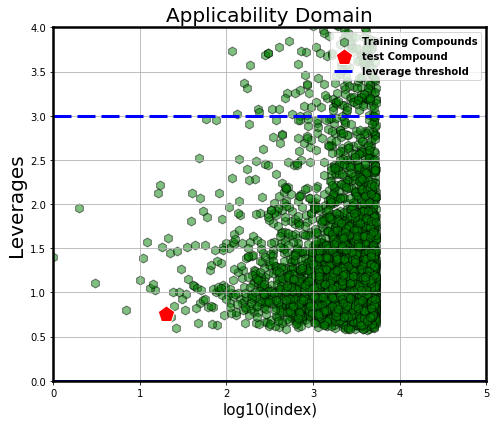

In [138]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 6))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
legend_properties = {'weight':'bold'}

plt.scatter(np.log10(df_train_5.index), df_train_5['leverages'], c='green', s=80, alpha=0.5, label="Training Compounds", marker="h", edgecolors='black')
#plt.scatter(np.log10(X_test.index), X_test['leverages'], c='red', s=80, alpha=0.5, label="Test Compounds",  marker="*", edgecolors='black')

plt.scatter(np.log10(new_test.index), new_test['leverages'], c='red', s=300, label="test Compound", marker="p", edgecolors='white')

plt.axhline(y = 3, color = 'blue', linestyle = '-', linewidth=3 , dashes=[6, 2], label= 'leverage threshold' ) #Note threshold is x=3 
plt.axhline(y = 0, color = 'blue', linestyle = '-', linewidth=3)
plt.title("Applicability Domain", fontsize=20)
plt.xlabel("log10(index)", fontsize=15)
plt.ylabel("Leverages", fontsize=20)
plt.legend(loc="upper right", prop=legend_properties)
plt.ylim(0, 4)
plt.xlim(0, 5)
plt.grid()
fig.savefig('gbm_AD.png')